In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
# read data from csv file
import os

housing = pd.read_csv('housing.csv')

In [6]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


housing.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002321CC1DF98>,
      dtype=object)

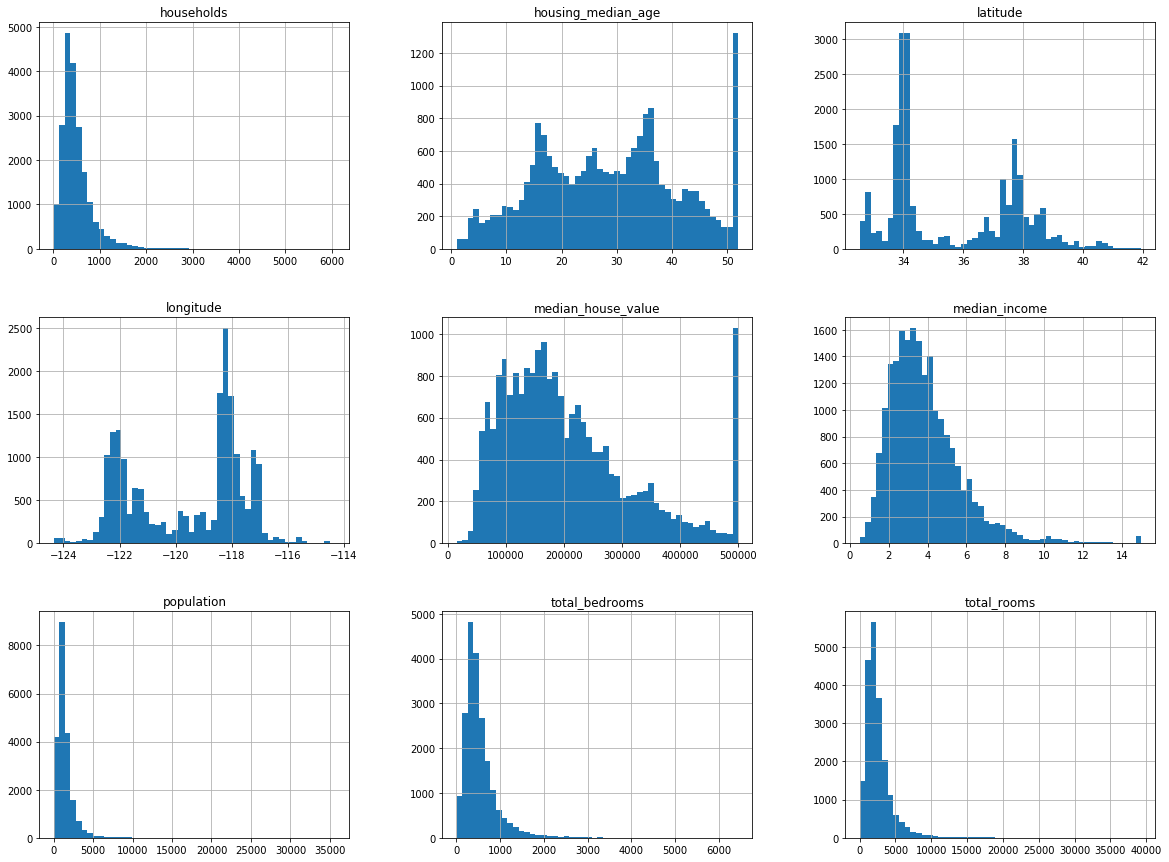

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

# Visualization location
![](https://www.google.com/maps/vt/data=Db2YNKog0WKomSfxMOoPoPrZc_vQ_zIfTqjK5D-yzoRPcY8QgpO-y5o-QdkON93c2ng42C8T2GymOfP14DfekgqJqFFApIhW8ww458OGUpOWzmniZ7Wk8RzHiaw6It_JYQGBRzRUIsjH7KahsG51QtwZoF4tFMn4-ghX8tFkHgZIsHXJKzDBVWJOzIjfXEyqGWagf9udOrAn8sFsUPgfoQ)

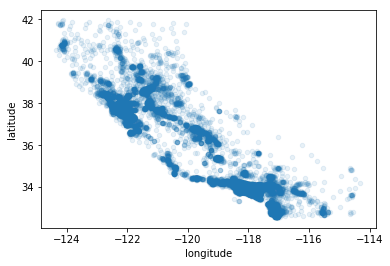

In [11]:
# Draw location data
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

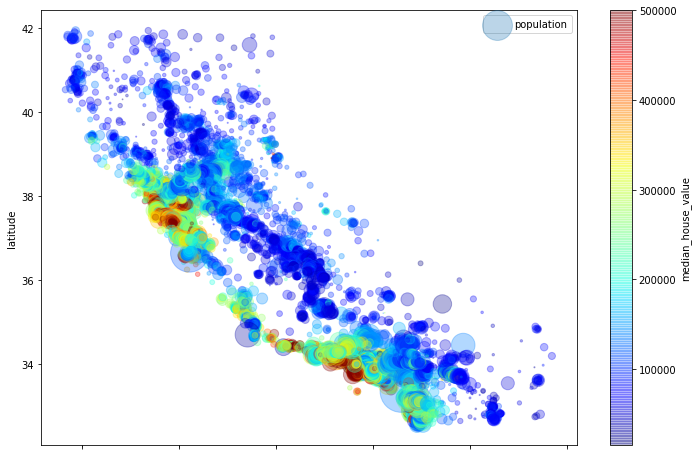

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
            s=housing['population']/20, label='population', figsize=(12,8),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [14]:
# Tính toán ma trận tương qua
corr_matrix = housing.corr()
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

# cleaning data

In [15]:
median = housing['total_bedrooms'].median()

In [18]:
housing['total_bedrooms'].fillna(median, inplace=True)

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Combination features

In [20]:
housing['room_per_household'] = housing['total_rooms']/housing['households']
housing['bedroom_per_household'] = housing['total_bedrooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']

In [21]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedroom_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945


In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values()

latitude                   -0.144160
longitude                  -0.045967
bedroom_per_household      -0.045637
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049457
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
room_per_household          0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

# Text to categories

In [24]:
#make one hot encode
housing_dummies = pd.get_dummies(housing, prefix=['ocean_proximity'])

In [25]:
housing_dummies.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedroom_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.02381,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.97188,2.109842,0,0,0,1,0


# Scaling data

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
housing_features = housing_dummies.drop('median_house_value', axis=1)

X_data = scaler.fit_transform(housing_features)

C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
X_data.shape

(20640, 16)

In [31]:
y_data = np.array(housing_dummies['median_house_value'])

print(y_data)

y_data = y_data.reshape(y_data.shape[0], 1)

y_data.shape

[452600. 358500. 352100. ...  92300.  84700.  89400.]


(20640, 1)

# Train test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(16512, 16)

In [34]:
X_test.shape

(4128, 16)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

def rmse_error(y_pred, y_test):
    mse_error = mean_squared_error(y_pred, y_test)
    return np.sqrt(mse_error)

In [39]:
rmse_error(y_pred, y_test)

73398.927410719